LAB 3 Computer Vision and Image Analysis

In [2]:
import numpy as np
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt
from PIL import Image
from Functions import *
import random
from PIL import Image, ImageFilter

In [46]:
img = Image.open('Images-jpg/camel.jpg')
#print(img)
#img.show()
I = np.asarray(img).astype(np.float64)
###Test display image
PIL_image = Image.fromarray(I.astype('uint8'), 'RGB')
print(I)
#print(PIL_image)
#PIL_image.save('test.jpg')
#print(len(I))
#print(I.shape)
#print(I)


[[[210. 204. 216.]
  [211. 205. 217.]
  [208. 202. 214.]
  ...
  [200. 197. 206.]
  [205. 202. 211.]
  [205. 202. 211.]]

 [[211. 205. 217.]
  [212. 206. 218.]
  [209. 203. 215.]
  ...
  [200. 197. 206.]
  [205. 202. 211.]
  [204. 201. 210.]]

 [[208. 202. 214.]
  [209. 203. 215.]
  [206. 200. 212.]
  ...
  [197. 194. 203.]
  [201. 198. 207.]
  [200. 197. 206.]]

 ...

 [[223. 171. 132.]
  [223. 170. 130.]
  [222. 167. 126.]
  ...
  [231. 172. 128.]
  [234. 177. 134.]
  [232. 177. 136.]]

 [[230. 178. 139.]
  [229. 177. 138.]
  [225. 172. 132.]
  ...
  [235. 176. 132.]
  [237. 182. 141.]
  [236. 183. 143.]]

 [[231. 178. 138.]
  [231. 176. 135.]
  [228. 171. 128.]
  ...
  [234. 177. 134.]
  [236. 183. 141.]
  [235. 183. 143.]]]


In [4]:
def kmeans_segm_display(image_name, K, L, seed):
    random.seed(seed)
    img = Image.open(image_name)
    I = np.asarray(img).astype(np.float32)
    means=[]
    for i in range(K) :
        a=random.random()*256
        b=random.random()*256
        c=random.random()*256
        means.append([a,b,c])
    longueur,largeur,c = I.shape

    for l in range(L):
        new_clusters = [[] for k in range(K)]
        new_clusters_index={}
        distance = 0
        for i in range(longueur):
            distance = scipy.spatial.distance_matrix(I[i],means)
            for j in range(largeur):
                arg = np.argmin(distance[j])
                new_clusters[arg].append(I[i,j])
                new_clusters_index[i,j]=arg

                
        #print(new_clusters)
        for k in range(K):
            if len(new_clusters[k]) > 1 :
                means[k] = np.mean(new_clusters[k],0)
        
        for i in range(longueur) :
            for j in range(largeur) :
                I[i,j]=means[new_clusters_index[i,j]]
        #print(seed)
    


    
    img = Image.fromarray(I.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    #return I, means

        

#segmentation, centers = kmeans_segm_display('Images-jpg/orange.jpg', 8, 15, 1)

#PIL_image = Image.fromarray(segmentation.astype('uint8'), 'RGB')
#PIL_image.save('orange_cluster4.jpg')
#PIL_image.show()



In [5]:

from scipy.spatial import distance_matrix

def kmeans_segm(image, K, L, seed):
    random.seed(seed)
    #img = Image.open(image_name)


    
    image = np.asarray(image).astype(np.float32)
    means=[]

    for i in range(K) :
        a=random.random()*256
        b=random.random()*256
        c=random.random()*256
        means.append([a,b,c])

    list_of_errors = []  #Error at every iterations
    the_L = []
    longueur,largeur,c = image.shape

    for l in range(L):
        new_clusters = [[] for k in range(K)]
        new_clusters_index={}
        distance = 0
        for i in range(longueur):
            distance = distance_matrix(image[i],means)
            for j in range(largeur):
                arg = np.argmin(distance[j])
                new_clusters[arg].append(image[i,j])
                new_clusters_index[i,j]=arg

        old_means = means[:]
        
        for k in range(K):
            if len(new_clusters[k]) > 1 :
                means[k] = np.mean(new_clusters[k],0)

        #Convergence test
        global_error = 0
        the_L.append(l+1)
        for k in range(K):
            error = 0
            for n in range(3):
                error = np.abs(old_means[k][n] - means[k][n])
            global_error += error

        list_of_errors.append(global_error)
 
    new_image= np.zeros((longueur,largeur), dtype=int)

  
    for i in range(longueur) :
        for j in range(largeur) :
            new_image[i,j]=new_clusters_index[i,j]
            
    #Graph of convergence
    plt.plot(the_L,list_of_errors)
    plt.xticks([1,5,10,15,20])
    plt.yticks([0,25,50,75,100,125,150,175,200])
    plt.xlabel("L")
    plt.ylabel("Error")
    plt.grid()
    plt.show()


    return new_image, means

In [6]:
def kmeans_example(K, L):
                  # K = number of clusters used
                     # L = number of iterations
    seed = 8           # seed used for random initialization
    scale_factor = 0.5  # image downscale factor
    image_sigma = 1.0   # image preblurring scale
    
    img = Image.open('Images-jpg/orange.jpg')
    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
    
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm, centers = kmeans_segm(I, K, L, seed)
    
    Inew = mean_segments(img, segm)
    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img.save('result/kmeans.png')


Question 2

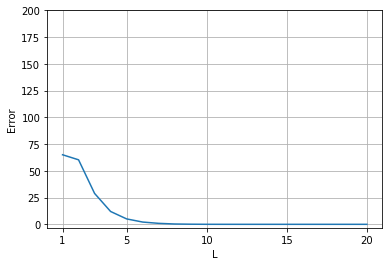

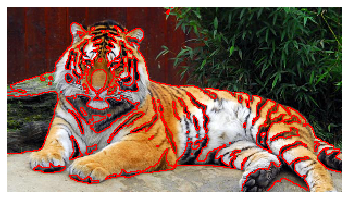

In [68]:
kmeans_example(2, 20)

In [ ]:
print('L = 1')
kmeans_example(10, 1)
print('L = 2')
kmeans_example(10, 2)
print('L = 5')
kmeans_example(10, 5)
print('L = 10')
kmeans_example(10, 10)
print('L = 15')
kmeans_example(10, 15)
print('L = 20')
kmeans_example(10, 20)

Question 3

In [ ]:

#For L = 15

print('K = 2')
kmeans_example(2, 15)
kmeans_segm_display('Images-jpg/orange.jpg', 2, 15, 8)
print('K = 4')
kmeans_example(4, 15)
kmeans_segm_display('Images-jpg/orange.jpg', 4, 15, 8)
print('K = 5')
kmeans_example(5, 15)
kmeans_segm_display('Images-jpg/orange.jpg', 5, 15, 8)
print('K = 8')
kmeans_example(8, 15)
kmeans_segm_display('Images-jpg/orange.jpg', 8, 15, 8)
print('K = 10')
kmeans_example(10, 15)
kmeans_segm_display('Images-jpg/orange.jpg', 10, 15, 8)



MEAN-SHIFT SEGMENTATION

In [3]:
import sys
import random
import math
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from Functions import showgrey, mean_segments, overlay_bounds
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial import distance_matrix

def mean_shift_segm(I, spatial_bandwidth, colour_bandwidth, num_iterations):

    #print('Find colour channels with K-means...')
    K = 16 # number of channels
    [ segm, centers ] = kmeans_segm(I, K, 20, 4321)
    #print(segm)
    ( height, width, depth ) = np.shape(I)
    idx = np.reshape(segm, (height, width))
    mapsw = np.zeros((height, width, K))
    mapsx = np.zeros((height, width, K))
    mapsy = np.zeros((height, width, K))
    [X, Y] = np.meshgrid(range(width), range(height))
    for k in range(K):
        mapsw[:,:,k] = (idx == k).astype(float)
        mapsx[:,:,k] = gaussian_filter(mapsw[:,:,k]*X, spatial_bandwidth, mode='nearest')
        mapsy[:,:,k] = gaussian_filter(mapsw[:,:,k]*Y, spatial_bandwidth, mode='nearest')
        mapsw[:,:,k] = gaussian_filter(mapsw[:,:,k],   spatial_bandwidth, mode='nearest')
    mapsw = np.reshape(mapsw, (-1, K)) + 1e-6
    mapsx = np.reshape(mapsx, (-1, K))
    mapsy = np.reshape(mapsy, (-1, K))

    #print('Search for high density points...')
    constC = -0.5/(colour_bandwidth**2)
    x = np.reshape(X, (width*height, ))
    y = np.reshape(Y, (width*height, ))
    Ic = np.reshape(I, (width*height, 3))
    wei = np.exp(constC*(distance_matrix(Ic, centers)**2))
    for l in range(num_iterations):
        p = (np.round(y)*width + np.round(x)).astype(int)
        ww = mapsw[p,:] * wei
        w = np.sum(ww, axis=1)
        u = (np.matmul(ww, centers).T / w).T
        x = ((np.sum(mapsx[p,:] * wei, axis=1)).T / w).T
        y = ((np.sum(mapsy[p,:] * wei, axis=1)).T / w).T
        wei = (ww.T / w).T
        x = np.maximum(np.minimum(x, width-1), 0);
        y = np.maximum(np.minimum(y, height-1), 0);

    #print('Assign high density points to pixels...')
    XY = np.stack((x, y))
    thr = 4.0
    val = 0
    mask = np.zeros((height*width, 1), dtype=np.short)
    for y in range(height):
        for x in range(width):
            p = y*width + x
            if mask[p] == 0:
                stack = [ p ]
                val = val + 1
                mask[p] = val
                while len(stack) > 0:
                    p0 = stack[-1]
                    xy = XY[:, p0]
                    y0 = int(p0/width)
                    x0 = p0 - y0*width
                    stack = stack[:-1]
                    pn = p0 + 1
                    if x0<width-1 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 - 1
                    if x0>0 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 + width
                    if y0<height-1 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
                    pn = p0 - width
                    if y0>0 and mask[pn]==0 and (np.sum((xy - XY[:, pn])**2)<thr):
                        stack = stack + [ pn ]
                        mask[pn] = val
    
    segm = np.reshape(mask, (height, width))
    return segm




spatial bandwith = 800
colour bandwith = 10


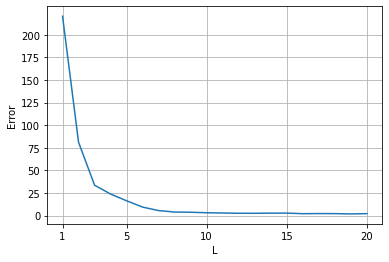

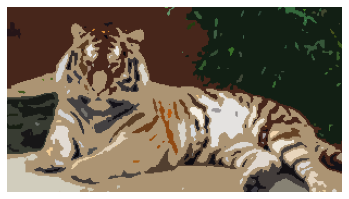

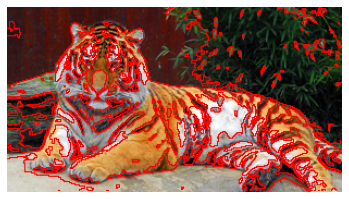

spatial bandwith = 100
colour bandwith = 10


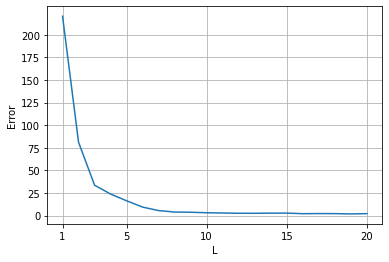

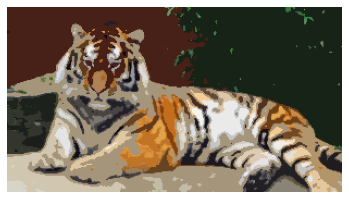

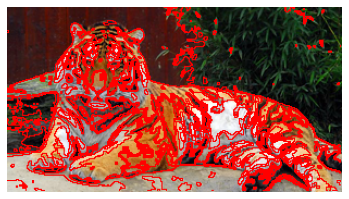

spatial bandwith = 10
colour bandwith = 600


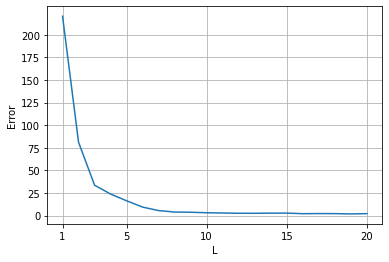

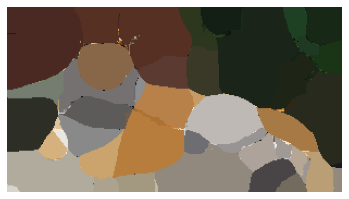

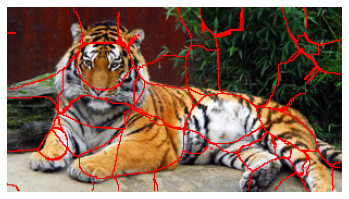

In [6]:
def mean_shift_example(spatial_bandwidth=10,colour_bandwidth=20):
    scale_factor = 0.5         # image downscale factor
    image_sigma = 1.0          # image preblurring scale
    #spatial_bandwidth = 10.0   # spatial bandwidth
    #colour_bandwidth = 20.0    # colour bandwidth
    num_iterations = 40        # number of mean-shift iterations
    
    img = Image.open('Images-jpg/tiger1.jpg')
    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
     
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm = mean_shift_segm(I, spatial_bandwidth, colour_bandwidth, num_iterations)
    Inew = mean_segments(img, segm)

    img2 = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

for [spatial,colour] in [[800,10],[100,10],[10,600]] :
    #[10,30],[10,50],[30,10],[50,10],[30,30],[50,30],[30,50],[50,50]] :
    print('spatial bandwith =', spatial)
    print('colour bandwith =', colour)
    mean_shift_example(spatial,colour)

NORMALIZED CUT

In [7]:
import sys
import math
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from Functions import showgrey, mean_segments, overlay_bounds
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial import distance_matrix
from scipy import sparse, optimize


def ncuts(A, D, n_ev):
    # Computes the n_ev smallest (non-zero) eigenvectors and eigenvalues of the 
    # of the Laplacian of A, where D is diagonal matrix with the row sums of A
    L = (D - A) + 1e-3*sparse.identity(np.size(D, 0))
    success = True
    try:
        #EVal, EV = sparse.linalg.lobpcg(L, X, M=D, largest=False)
        EVal, EV = sparse.linalg.eigsh(L, k=n_ev, M=D, which='SM', tol=1e-3, maxiter=10000)
    except:
        print("Failed to find eigenvectors")
        EVal = np.array([ 0, 0 ])
        EV = np.zeros((np.size(L, axis=0), 2))
        success = False
    return EV, EVal, success


# NcutValue - 2.1 Computing the Optimal Partition Ncut. eq (5)
#
# Synopsis
#  ncut = ncuts_value(T, U2, D, W);
#
# Inputs ([]s are optional)
#  (scalar) t        splitting point (threshold)
#  (vector) U2       N x 1 vector representing the 2nd smallest
#                     eigenvector computed at step 2.
#  (matrix) W        N x N weight matrix
#  (matrix) D        N x N diagonal matrix
#
# Outputs ([]s are optional)
#  (scalar) ncut     The value calculated at the right term of eq (5).
#                    This is used to find minimum Ncut.
#
# Authors
#  Naotoshi Seo <sonots(at)sonots.com>
#
# License
#  The program is free to use for non-commercial academic purposes,
#  but for course works, you must understand what is going inside to use.
#  The program can be used, modified, or re-distributed for any purposes
#  if you or one of your group understand codes (the one must come to
#  court if court cases occur.) Please contact the authors if you are
#  interested in using the program without meeting the above conditions.
#
# Changes
#  10/01/2006  First Edition
#  15/10/2021  Python version (Marten Bjorkman)

def ncuts_value(t, U2, W, D):
    x = np.where(U2 > t, 1, -1)
    d = D.diagonal()
    k = np.sum(d[x > 0]) / sum(d)
    b = k/(1 - k)
    y = (1 + x) - b*(1 - x)
    ncut = y.dot((D - W) @ y) / y.dot(D @ y)
    return ncut


# NcutPartition - Partitioning
#
# Synopsis
#  [sub ids ncuts] = ncuts_partition(I, W, sNcut, sArea, [id])
#
# Description
#  Partitioning. This function is called recursively.
#
# Inputs ([]s are optional)
#  (vector) I        N x 1 vector representing a segment to be partitioned.
#                    Each element has a node index of V (global segment).
#  (matrux) W        N x N matrix representing the computed similarity
#                    (weight) matrix.
#                    W(i,j) is similarity between node i and j.
#  (scalar) sNcut    The smallest Ncut value (threshold) to keep partitioning.
#  (scalar) sArea    The smallest size of area (threshold) to be accepted
#                    as a segment.
#  (string) [id]     A label of the segment (for debugg)
#
# Outputs ([]s are optional)
#  (cell)   Seg      A cell array of segments partitioned.
#                    Each cell is the each segment.
#  (cell)   Id       A cell array of strings representing labels of each segment.
#                    IDs are generated as children based on a parent id.
#  (cell)   Ncut     A cell array of scalars representing Ncut values
#                    of each segment.
#
# Requirements
#  NcutValue
#
# Authors
#  Naotoshi Seo <sonots(at)sonots.com>
#
# License
#  The program is free to use for non-commercial academic purposes,
#  but for course works, you must understand what is going inside to use.
#  The program can be used, modified, or re-distributed for any purposes
#  if you or one of your group understand codes (the one must come to
#  court if court cases occur.) Please contact the authors if you are
#  interested in using the program without meeting the above conditions.
#
# Changes
#  10/01/2006  First Edition
#  15/10/2021  Python version (Marten Bjorkman)

def ncuts_partition(I, W, sNcut, sArea, id, maxDepth, depth):
    N = np.shape(W)[0]
    d = np.sum(W, axis=1)
    D = sparse.spdiags(d.reshape(-1), [0], N, N, format='csr') # D = diagonal matrix

    # Step 2 and 3. Solve generalized eigensystem (D -W)*S = S*D*U (12).
    # (13) is not necessary thanks to smart matlab. Get the 2 smallests ('sm')
    [EV, EVal, success] = ncuts(W, D, 2)

    # 2nd smallest (1st smallest has all same value elements, and useless)
    U2 = EV[:, 1]
    
    # Step 3. Refer 3.1 Example 3.
    # Bipartition the graph at point that Ncut is minimized.
    t = np.mean(U2)
    if success == True:
        t = optimize.minimize(ncuts_value, t, args=(U2, W, D), method='Nelder-Mead', options={'maxiter': 20}).x
    A = np.where(U2 > t)[0]
    B = np.where(U2 <= t)[0]
    
    # Step 4. Decide if the current partition should be divided
    #   if either of partition is too small, stop recursion.
    #   if Ncut is larger than threshold, stop recursion.
    if success == True:
        ncut = ncuts_value(t, U2, W, D)
    else:
        ncut = sNcut
    print(f'Cutting ncut=%.3f sizes=(%d,%d) %s' % (ncut, np.size(A), np.size(B), id))
    if np.size(A)<sArea or np.size(B)<sArea or ncut>=sNcut or depth>maxDepth:
        Seg = [ I ]
        Id = [ id ]     # for debugging
        Ncut = [ ncut ] # for debugging
        return Seg, Id, Ncut

    # recursively create segments of A
    SegA, IdA, NcutA = ncuts_partition(I[A], W[:,A][A,:], sNcut, sArea, id+'-A', maxDepth, depth+1)

    # recursively create segments of B
    SegB, IdB, NcutB = ncuts_partition(I[B], W[:,B][B,:], sNcut, sArea, id+'-B', maxDepth, depth+1)
    
    # concatenate cell arrays
    Seg  =  SegA + SegB 
    Id   =  IdA + IdB
    Ncut =  NcutA + NcutB
    return Seg, Id, Ncut


def ncuts_affinity(im, XY_RADIUS, RGB_SIGMA):
    (h, w, _) = np.shape(im)

    # Find all pairs of pixels within a distance of XY_RADIUS
    rad = int(math.ceil(XY_RADIUS))
    [di,dj] = np.meshgrid(range(-rad, rad + 1), range(-rad, rad + 1))
    dv = (dj**2 + di**2) <= XY_RADIUS**2
    di = di[dv]
    dj = dj[dv]
    [i,j] = np.meshgrid(range(w), range(h))
    i = np.repeat(i[:, :, np.newaxis], len(di), axis=2)
    j = np.repeat(j[:, :, np.newaxis], len(di), axis=2)
    i_ = i - di
    j_ = j - dj
    v = np.where((i_ >= 0) & (i_ < w) & (j_ >= 0) & (j_ < h))
    pair_i =  j[v]*w +  i[v]
    pair_j = j_[v]*w + i_[v]

    # Weight each pair by the difference in RGB values, divided by RGB_SIGMA
    RGB = np.reshape(im/RGB_SIGMA, (-1, 3))
    R = RGB[pair_i,:]
    W = np.exp(-np.sum((RGB[pair_i,:] - RGB[pair_j,:])**2, axis=1)).astype(np.float64)
    
    # Construct an affinity matrix
    A = sparse.csr_matrix((W, (pair_i, pair_j)), shape=(w*h, w*h))

    return A


def norm_cuts_segm(I, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth):
    
    (nRow, nCol, c) = np.shape(I)
    N = nRow * nCol
    V = np.reshape(I, (N, c))    
    
    print('Compute affinity matrix...')
    W = ncuts_affinity(I, radius, colour_bandwidth)

    print('Solve eigenvalue problems to find partitions...')
    Seg = np.arange(N, dtype=np.int32)
    [Seg, Id, Ncut] = ncuts_partition(Seg, W, ncuts_thresh, min_area, 'ROOT', max_depth, 1)

    segm = np.zeros((N, 1), dtype=np.int32)
    for i in range(len(Seg)):
        segm[Seg[i]] = i
        print('Ncut = %f  %s' % (Ncut[i], Id[i]))
        
    segm = np.reshape(segm, (nRow, nCol)).astype(np.int32)
    return segm



############################################

def norm_cuts_example(colour_bandwidth, radius,  ncuts_thresh, min_area, max_depth):
    #colour_bandwidth = 20.0  # color bandwidth
    #radius = 1               # maximum neighbourhood distance
    #ncuts_thresh = 0.10      # cutting threshold
    #min_area = 200           # minimum area of segment
    #max_depth = 12           # maximum splitting depth
    scale_factor = 0.25      # image downscale factor
    image_sigma = 0.5        # image preblurring scale

    img = Image.open('Images-jpg/tiger1.jpg')
    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))
     
    h = ImageFilter.GaussianBlur(image_sigma)
    I = np.asarray(img.filter(ImageFilter.GaussianBlur(image_sigma))).astype(np.float32)
    
    segm = norm_cuts_segm(I, colour_bandwidth, radius, ncuts_thresh, min_area, max_depth)
    Inew = mean_segments(img, segm)

    #print(Inew)
    Inew_display = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(Inew_display)
    plt.axis('off')
    plt.show()

    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img.save('result/normcuts1.png')




In [15]:
A = [1,2,3,2,1,0,1,0]
C = [1,2,3,4,5,5,6,7]
B = [C[i] for i in range(len(A)) if A[i]==1]
print(B)


[1, 5, 6]


In [ ]:
norm_cuts_example(200.0, 10, 1, 20, 12)

In [ ]:
norm_cuts_example(20.0, 1, 0.10, 200, 5)

SEGMENTATION USING GRAPH CUTS

In [56]:

def kmeans_segm_part_5(image, K, L, seed):
    random.seed(seed)
    #img = Image.open(image_name)


    
    #image = np.asarray(image).astype(np.float32)
    means=[]

    for i in range(K) :
        a=random.random()*256
        b=random.random()*256
        c=random.random()*256
        means.append([a,b,c])

    list_of_errors = []  #Error at every iterations
    the_L = []
    longueur,largeur = len(image),len(image[0])
    

    for l in range(L):
        
        
        new_clusters = [[] for k in range(K)]
        new_clusters_index={}
        distance = 0
        #for i in range(longueur):
            #print('iiii')
            #print(means)
        distance = scipy.spatial.distance_matrix(image,means)
        #print(distance)
        for i in range(len(distance)):
            arg = np.argmin(distance[i])
            new_clusters[arg].append(image[i])
            new_clusters_index[i]=arg

        old_means = means[:]
        #print(new_clusters)
         
        for k in range(K):
            if len(new_clusters[k]) > 1 :
                #print(means[k])   
                means[k] = np.mean(new_clusters[k],0)
                #print(means[k])
                #print('--------')   

        #Convergence test
        global_error = 0
        the_L.append(l+1)
        #print(old_means)
        #print(means)
        for k in range(K):
            error = 0
            for n in range(3):
                error += np.abs(old_means[k][n] - means[k][n])
            global_error += error

        list_of_errors.append(global_error)
 
    new_image= np.zeros((longueur), dtype=int)

  
    for i in range(longueur) :

        new_image[i]=new_clusters_index[i]


    return new_image, means

In [ ]:
"""
c = np.array([0,0,0], [1,1,1])
m = np.array([2,2,2],[2,2,2])
a = c-m
cov = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
res = np.exp((a.dot(cov))).dot(a.T)
print(res)

A = [[0.18431373,0.10980392,0.11764706]]
B = [[34.39724649277471, 216.94303665593156, 195.5263024580132], [65.29767058929195, 126.83138229553688, 115.06971258591696], [166.80780101702732, 201.91317789069137, 24.028054214204133]]
scipy.spatial.distance_matrix(A,B)
"""
image = Image.open('Images-jpg/tiger1.jpg')
image = np.asarray(image).astype(np.float32)
print(image)
print(image.shape)
np.ones((340,616,3))


In [2]:
import sys
import math
import random
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
#from lab3 import kmeans_segm, mixture_prob
from Functions import showgrey, mean_segments, overlay_bounds
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial import distance_matrix
from scipy.signal import convolve2d, correlate2d
from Functions import *
import random



def kmeans_segm(image, K, L, seed):
    random.seed(seed)
    #img = Image.open(image_name)


    
    image = np.asarray(image).astype(np.float32)
    means=[]

    for i in range(K) :
        a=random.random()*256
        b=random.random()*256
        c=random.random()*256
        means.append([a,b,c])

    list_of_errors = []  #Error at every iterations
    the_L = []
    longueur,largeur,c = image.shape

    for l in range(L):
        new_clusters = [[] for k in range(K)]
        new_clusters_index={}
        distance = 0
        for i in range(longueur):
            distance = scipy.spatial.distance_matrix(image[i],means)
            for j in range(largeur):
                arg = np.argmin(distance[j])
                new_clusters[arg].append(image[i,j])
                new_clusters_index[i,j]=arg

        old_means = means[:]
        
        for k in range(K):
            if len(new_clusters[k]) > 1 :
                means[k] = np.mean(new_clusters[k],0)

        #Convergence test
        global_error = 0
        the_L.append(l+1)
        for k in range(K):
            error = 0
            for n in range(3):
                error = np.abs(old_means[k][n] - means[k][n])
            global_error += error

        list_of_errors.append(global_error)
 
    new_image= np.zeros((longueur,largeur), dtype=int)

  
    for i in range(longueur) :
        for j in range(largeur) :
            new_image[i,j]=new_clusters_index[i,j]

    return new_image, means



def mixture_prob(image, K, L, mask):

    I = Image.open(image)
    Img = np.asarray(I).astype(np.float32)
    Ivec = np.reshape(I, (-1, 3)).astype(np.float32)
    covariance_matricices = []

    #Initialization of the means
    segm, means = kmeans_segm(Img, K, L, 1)
    means = np.array(means)

    #Initialization of the covariance matrices
    for k in range(K):
        covariance_matricices.append([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.1]])
    covariance_matricices = np.array(covariance_matricices)

    #Initialization of weights and mask 
    liste = np.array([0]*K)
    h,l,c = Img.shape
    print(h,l)
    size = h*l
    #mask_image = np.zeros((size,3))
    mask_image = []
    print('on entre')
    for i in range(h):
        for j in range(l):
            liste[segm[i,j]]+=1
            #print(j)        
            if mask[i,j] == 1:
                #mask_image[i*l+j+1] = Ivec[i,j]
                
                mask_image.append(Img[i,j])
                #print(mask_image)
                # mask_image = [Img[i,j] for (i,j) in list(itertools.product(range(h), range(l))) if mask[i,j] == 1]
    print('hhhhhh')
    print('mask')
    #mask_image = np.array(mask_image)
    #print(mask_image)
    print('mask')
    weights = np.array([elt/size for elt in liste])
    print('weight')
    V = [means, covariance_matricices, weights]

    #Loop
    print('Loop')
    for ll in range(L):
        print('ll')
        for k in range(K):
            print('K')
            gk = np.array([])
            #Expectation
            factor = 1/math.sqrt(((2*math.pi)**3)*np.linalg.det(covariance_matricices[k]))
            colour_minus_mean = mask_image - means[k]
            inv_cov = np.linalg.inv(covariance_matricices[k])
            gauss = factor*np.exp(0.5*(colour_minus_mean.dot(inv_cov)).dot(np.transpose(colour_minus_mean)))
            gk.append(gauss)
        
        num = weights*gk
        denom = np.sum(num,1)
        pik = num/denom

        #Maximization
        sum_pik_on_i = np.sum(pik,2)

        #Weights
        weights = (1/size)*sum_pik_on_i

        #Means
        pik_times_ci = pik*mask_image
        means = np.sum(pik_times_ci,0)/sum_pik_on_i

        #Covariance_matrices
        for k in range(K):
            sum = 0
            for i in range(len(mask_image)):
                a = mask_image[i] - means[k]
                sum+= pik[i,k]*np.transpose(a).dot(a)
            
            covariance_matricices[k] = sum/sum_pik_on_i
        
    
    for k in range(K):
        gk = np.array([])
        factor = 1/math.sqrt(((2*math.pi)**3)*np.linalg.det(covariance_matricices[k]))
        colour_minus_mean = mask_image - means[k]
        inv_cov = np.linalg.inv(covariance_matricices[k])
        gauss = factor*np.exp(0.5*(colour_minus_mean.dot(inv_cov)).dot(np.transpose(colour_minus_mean)))
        gk.append(gauss)

    num = weights*gk
    denom = np.sum(num,1)
    print(denom)




    return denom





def cmf_cut(ur, alpha):
    
    [rows, cols] = np.shape(ur)
    imgSize = rows*cols

    cc = 0.3         # step-size of the augmented Lagrangian method, typically [0.3, 3]
    errbound = 1e-4  # error bound for convergence
    numIter = 100    # maximum iteration number (100)
    steps = 0.16     # step-size for gradient projection step to total variation, typically [0.1, 0.17]

    # build up the data terms
    urb = 0.8*ur + 0.1
    Cs = -np.log(1.0 - urb).astype(np.float32)
    Ct = -np.log(urb).astype(np.float32)

    # the initial value of u is set to be an initial cut, see below.
    u = np.where(Cs > Ct, 1.0, 0.0).astype(np.float32)
    # the initial values of two terminal flows ps and pt are set to be the specified legal flows.
    ps = np.minimum(Cs, Ct)
    pt = ps

    # the initial value of the spatial flow fiels p = (pp1, pp2) is set to be zero.
    pp1 = np.zeros((rows, cols+1), dtype=np.float32)
    pp2 = np.zeros((rows+1, cols), dtype=np.float32)
    divp = pp1[:,1:cols+1] - pp1[:,0:cols] + pp2[1:rows+1,:] - pp2[0:rows,:]

    erriter = np.zeros((numIter, 1))

    for i in range(numIter):
        # update the spatial flow field p = (pp1, pp2):
        #   the following steps are the gradient descent step with steps as the step-size.
        pts = divp - (ps - pt + u/cc)
        pp1[:,1:cols] = pp1[:,1:cols] + steps*(pts[:,1:cols] - pts[:,0:cols-1]) 
        pp2[1:rows,:] = pp2[1:rows,:] + steps*(pts[1:rows,:] - pts[0:rows-1,:])

        # the following steps give the projection to make |p(x)| <= alpha(x)
        gk = np.sqrt((pp1[:,0:cols]**2 + pp1[:,1:cols+1]**2 + pp2[0:rows,:]**2 + pp2[1:rows+1,:]**2)*0.5)
        gk = (np.where(gk <= alpha, 1, 0) + np.where(gk <= alpha, 0, 1) * (gk / alpha)).astype(np.float32)
        gk = 1 / gk
        
        pp1[:,1:cols] = (0.5*(gk[:,1:cols] + gk[:,0:cols-1])) * pp1[:,1:cols] 
        pp2[1:rows,:] = (0.5*(gk[1:rows,:] + gk[0:rows-1,:])) * pp2[1:rows,:]
        divp = pp1[:,1:cols+1] - pp1[:,0:cols] + pp2[1:rows+1,:] - pp2[0:rows,:]
        
        # updata the source flow ps
        pts = divp + pt - u/cc + 1/cc
        ps = np.minimum(pts, Cs)
    
        # update the sink flow pt
        pts = - divp + ps + u/cc
        pt = np.minimum(pts, Ct)

	# update the multiplier u
        erru = cc*(divp + pt  - ps)
        u = u - erru

        # evaluate the avarage error
        erriter[i] = np.sum(np.abs(erru))/imgSize
        
        if erriter[i] < errbound:
            break

    print('number of iterations = %u' % (i+1))
    return u, erriter, i



def graphcut_segm(I, area, K, alpha, sigma):
    [ minx, miny, maxx, maxy ] = area
    [h,w,c] = np.shape(I)
    dw = maxx - minx + 1
    dh = maxy - miny + 1
    mask = np.zeros((h, w), dtype=np.int16)
    mask[miny:miny+dh, minx:minx+dw] = 1

    grey = 0.2989*I[:,:,0] + 0.5870*I[:,:,1] + 0.1140*I[:,:,2]

    blur = 0.5 # amount of blur to reduce noise
    gauss = np.array([[ math.exp(-(i*i)/(2*blur*blur)) for i in range(-3, 4) ]], dtype=np.float32)
    gauss = gauss/np.sum(gauss) # normalize to one
    grey = convolve2d(grey, gauss.T @ gauss, 'same', 'symm')

    sobel = np.array([[-1, 0, 1], [-2,0,2], [-1,0,1]], dtype=np.float32)/4
    dx = convolve2d(grey, sobel,   'same', 'fill', 0)
    dy = convolve2d(grey, sobel.T, 'same', 'fill', 0)
    grad = np.sqrt(dx**2 + dy**2)

    edge = (alpha*sigma)*np.ones((h,w)) / (grad + sigma)

    for l in range(3):
        print('Find Gaussian mixture models...')
        fprob = mixture_prob(I, K, 10, mask)
        bprob = mixture_prob(I, K, 10, 1-mask)
        prior = np.reshape(fprob/(fprob + bprob), (h, w))

        print('Find minimum cut...')
        [u, erriter, i] = cmf_cut(prior, edge)
        mask = (u>0.5).astype(np.int16)

    return mask, prior

##############################





In [3]:
prob = mixture_prob('Images-jpg/tiger1.jpg', 3, 3, np.ones((340,616)))

340 616
on entre


In [70]:
def graphcut_example():
    scale_factor = 0.5           # image downscale factor
    area = [ 80, 110, 570, 300 ] # image region to train foreground with [ minx, miny, maxx, maxy ]
    K = 3                      # number of mixture components
    alpha = 15.0                  # maximum edge cost
    sigma = 10.0                 # edge cost decay factor

    img = Image.open('Images-jpg/tiger1.jpg')
    img = img.resize((int(img.size[0]*scale_factor), int(img.size[1]*scale_factor)))

    area = [ int(i*scale_factor) for i in area ]
    I = np.asarray(img).astype(np.float32)
    segm, prior = graphcut_segm(I, area, K, alpha, sigma)
    
    Inew = mean_segments(img, segm)
    if True:
        Inew = overlay_bounds(img, segm)

    img = Image.fromarray(Inew.astype(np.ubyte))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    img.save('result/graphcut.png')

In [ ]:
image = Image.open('Images-jpg/tiger3.jpg')
image = np.asarray(image).astype(np.float32)
graphcut_example()
